In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

from collections import Counter
from PIL import Image

In [70]:
# read in genomic data
sam = pd.read_csv("samantha", sep="\t")

# read in labelled snps

met = pd.read_csv('nutrition_snps/metabolism.csv')
taste = pd.read_csv('nutrition_snps/taste.csv')
smell = pd.read_csv('nutrition_snps/smell.csv')

In [76]:
# format data

taste["Outcome"] = taste["Outcome"].apply(lambda x: x.lower())
smell["RSID"] = smell["RSID"].apply(lambda x: x.split(" ")[0])

In [4]:
# if you are going to put all images into a folder

# current_directory = os.getcwd()
# new_directory = os.path.join(current_directory, r'sam')
# if not os.path.exists(new_directory):
#     os.makedirs(new_directory)

Text(0.5, 1.0, 'SNPs per Chromosome')

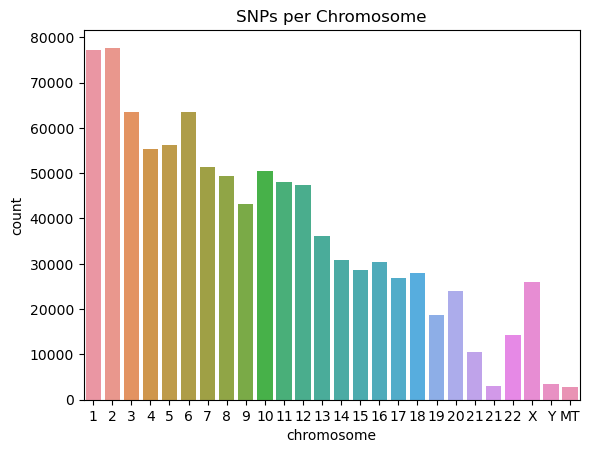

In [5]:
sns.countplot(data=sam, x='chromosome')
plt.title('SNPs per Chromosome')
# plt.savefig('sam/snpsperchromosome');

## Chart Generation

### Taste

In [6]:
taste_df = pd.merge(sam, taste, right_on = 'RSID', left_on='# rsid', how='inner')
taste_df.head()

,# rsid,chromosome,position,genotype,RSID,Gene,Type,Outcome,Link
0,rs35744813,1,1255323,CC,rs35744813,TAS1R3,Food,less sensitivity to sucrose,https://www.frontiersin.org/articles/10.3389/f...
1,rs307377,1,1259417,CC,rs307377,TAS1R3,Taste,less sensitivity for umami,https://www.frontiersin.org/articles/10.3389/f...
2,rs4908563,1,6546086,CC,rs4908563,TAS1R1,Taste,preference for umami,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...
3,rs34160967,1,6557893,GG,rs34160967,TAS1R1,Taste,preference for umami,https://www.frontiersin.org/articles/10.3389/f...
4,rs34160967,1,6557893,GG,rs34160967,TAS1R1,Taste,less sensitivity for sourness,https://www.frontiersin.org/articles/10.3389/f...


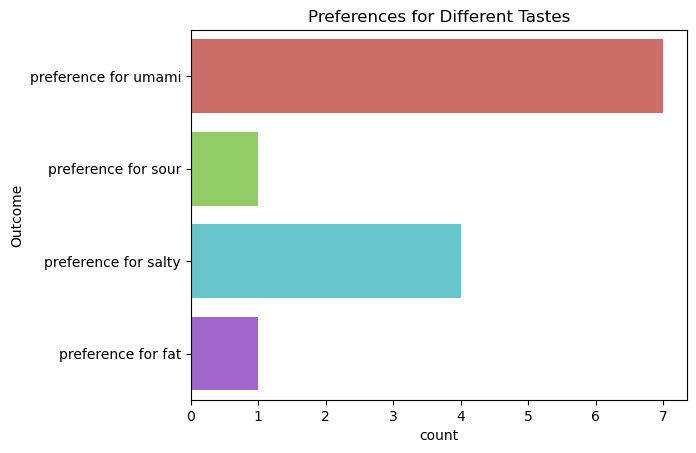

In [7]:
# taste preference

taste_pref = taste_df[(taste_df["Type"] == "Taste") & (taste_df["Outcome"].str.contains('preference'))]

sns.countplot(data=taste_pref, y='Outcome', palette=sns.color_palette("hls", 4)) \
    .set_title("Preferences for Different Tastes");

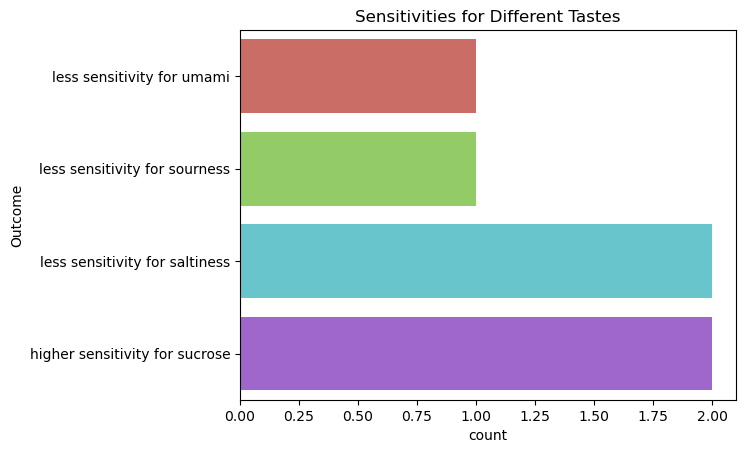

In [8]:
# taste sensitivities

taste_sens = taste_df[(taste_df["Type"] == "Taste") & (taste_df["Outcome"].str.contains('sensitivity'))]

sns.countplot(data=taste_sens, y='Outcome', palette=sns.color_palette("hls", 4)) \
    .set_title("Sensitivities for Different Tastes");

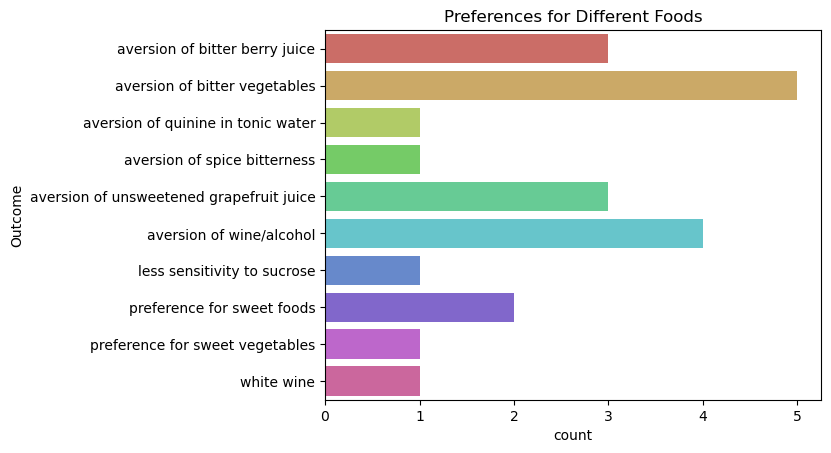

In [9]:
# preferences for different foods

food_pref = taste_df[(taste_df["Type"] == "Food") & (~taste_df["Outcome"].str.contains("sensitvity"))]

sns.countplot(data=food_pref, y='Outcome', \
              order=sorted(food_pref.Outcome.unique()), \
              palette=sns.color_palette("hls", len(food_pref.Outcome.unique()))) \
    .set_title("Preferences for Different Foods");

In [63]:
food_pref.groupby("Outcome", as_index=False).agg({"# rsid": len}).to_csv("food_pref.csv")

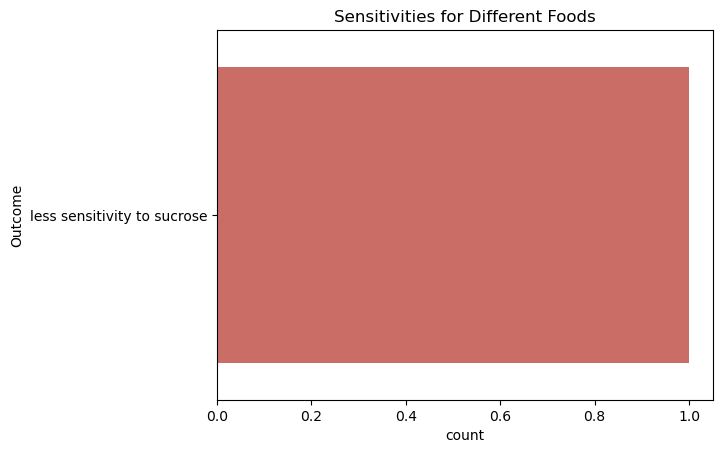

In [10]:
# sensitivities for different foods

food_sens = taste_df[(taste_df["Type"] == "Food") & (taste_df["Outcome"].str.contains("sensitivity"))]

sns.countplot(data=food_sens, y='Outcome', palette=sns.color_palette("hls", len(food_sens.Outcome.unique()))) \
    .set_title("Sensitivities for Different Foods");

In [11]:
# separate aversions and preferences

def separate_outcomes(series):
    aversions = []
    preferences = []
    higher_sensitivity = []
    lower_sensitivity = []

    for food in series:
        if "high" in food.lower() and "sensitivity" in food.lower():
            higher_sensitivity.append(food)
        elif "less" in food.lower() and "sensitivity" in food.lower():
            lower_sensitivity.append(food)
        elif "aversion" in food.lower():
            aversions.append(food)
        else:
            preferences.append(food)
            
    return (aversions, preferences, higher_sensitivity, lower_sensitivity)

In [12]:
aversions, preferences, higher_sensitivity, lower_sensitivity = separate_outcomes(food_pref.Outcome.unique())

In [13]:
# function to open images and display

def display_images(outcomes, title=""):
    def create_food_path(outcome):
        path = ""
        if outcome:
            path = "pics/" + "".join(outcome.replace("/", "_").split(" ")).lower() + ".png"
        return path
    
    images = [Image.open(create_food_path(out)) for out in outcomes] 
    rows = len(images)//3
    cols = 3
    
    fig, ax = plt.subplots(rows, cols, figsize=(10,5))
    fig.suptitle(title, fontsize=20)

    for i, image in enumerate(images):
        try:
            if rows == 1:
                curr_ax = ax[i]
            else:
                curr_ax = ax[i//3, i%3]
        except:
            curr_ax = ax
        curr_ax.set_title(outcomes[i])
        curr_ax.imshow(image)

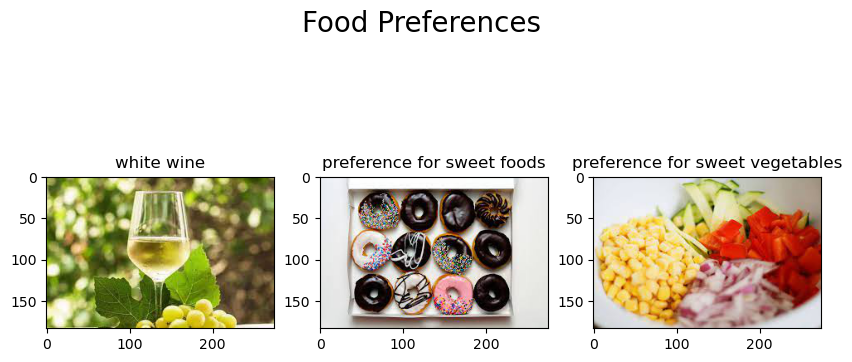

In [14]:
display_images(preferences, "Food Preferences")

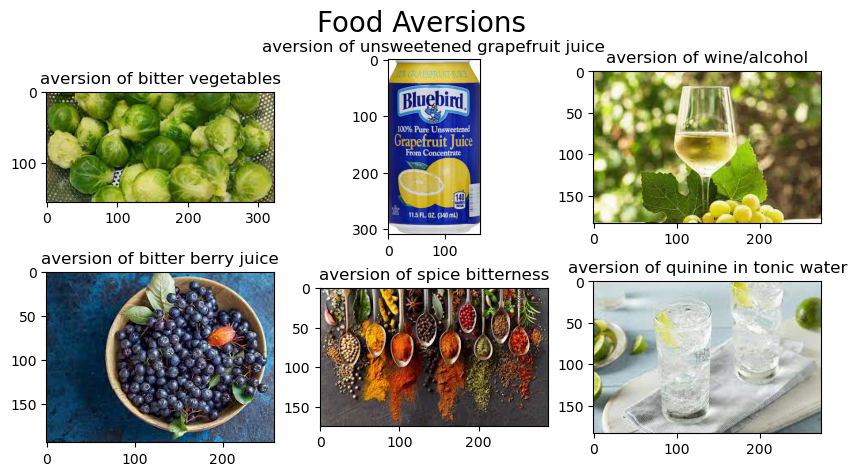

In [15]:
display_images(aversions, "Food Aversions")

### Smell

In [79]:
smell_df = pd.merge(sam, smell, right_on = 'RSID', left_on='# rsid', how='inner')


In [80]:
total_smell = met.groupby("Outcome", as_index=False).agg({"RSID": len})
smell_outcome = met_df.groupby("Outcome", as_index=False).agg({"RSID": len})
smell_outcome["total_possible"] = total_smell["RSID"]
smell_outcome["proportion"] = smell_outcome["RSID"]/total_smell["RSID"]

<AxesSubplot: xlabel='RSID'>

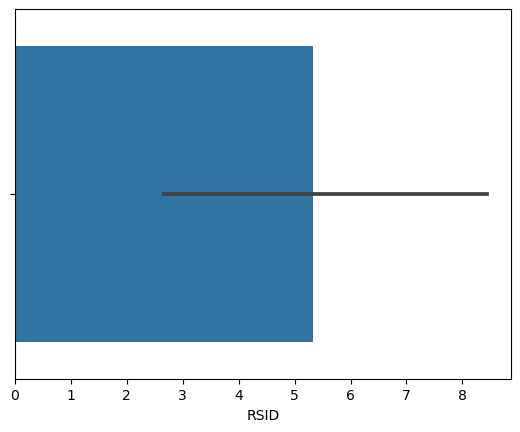

In [82]:
sns.barplot(data=smell_outcome, x="RSID")

## Metabolism

In [71]:
met_df = pd.merge(sam, met, right_on = 'RSID', left_on='# rsid', how='inner')
met_df.head()

,# rsid,chromosome,position,genotype,RSID,Gene,Type,Outcome,Link
0,rs12130333,1,62964365,CC,rs12130333,"ANGPTL3, LEPR",lipid,increased fatty acid level,NaN
1,rs4846914,1,228362314,AA,rs4846914,GALNT2,lipid,increased fatty acid level,NaN
2,rs693,2,21085700,AG,rs693,APOB,metabolism,increased carbohydrate metabolism,https://academic.oup.com/jcem/article/99/2/E38...
3,rs1260326,2,27584444,CT,rs1260326,GCKR,lipid,increased fatty acid level,NaN
4,rs4299376,2,43926080,GT,rs4299376,ABCG8,metabolism,increased carbohydrate metabolism,https://academic.oup.com/jcem/article/99/2/E38...


In [72]:
total_met = met.groupby("Outcome", as_index=False).agg({"RSID": len})
met_outcome = met_df.groupby("Outcome", as_index=False).agg({"RSID": len})
met_outcome["total_possible"] = total_met["RSID"]
met_outcome["proportion"] = met_outcome["RSID"]/total_met["RSID"]

In [73]:
met_outcome.sort_values("proportion", ascending=False)

,Outcome,RSID,total_possible,proportion
5,low iron level,3,3,1.000000
7,more prone to drunk,3,3,1.000000
4,less prone to drunk,5,6,0.833333
2,increased carbohydrate metabolism,15,20,0.750000
3,increased fatty acid level,7,10,0.700000
1,greater caffeine induced anxiety,2,5,0.400000
8,prevent lactose intolerance,2,5,0.400000
0,burning pain and capsaicin sensitivity,10,37,0.270270
6,lower vitamin D levels,1,4,0.250000


In [232]:
for food in list(taste[taste["Type"] == 'Food'].Outcome.unique()):
    try:
        print("".join(food.split(" ")).lower() + ".png")
    except:
        print(food)

aversionofbittervegetables.png
preferenceforsweetvegetables.png
aversionofcilantro(tastessoapy).png
whitewine.png
artichokes.png
broccoli.png
bacon.png
oilorbutteronbread.png
bluecheese.png
icecream.png
liver.png
coffee.png
aversionofwine/alcohol.png
aversionofbittervegetables.png
aversionofbitterberryjuice.png
aversionofunsweetenedgrapefruitjuice.png
aversionofquinineintonicwater.png
preferencetounsweetenedgrapefruitjuice.png
aversionofspicebitterness.png
preferenceforcreaminess,oiliness,andfatcontent.png
aversionforcreaminess,oiliness,andfatcontent.png
highersensitivityforberryjuicesamplesourness.png
highersensitivityforwinesourness.png
lesssensitvitytosucrose.png
preferenceforsweetfoods.png


In [5]:
from wikitools3 import wiki, category, page


In [12]:
# create a Wiki object
site = wiki.Wiki("http://my.wikisite.org/w/api.php") 
# login - required for read-restricted wikis
site.login("username", "password")
# define the params for the query
params = {'action':'query', 'titles':'Main Page'}
# create the request object
request = api.APIRequest(site, params)
# query the API
result = request.query()

AttributeError: 'int' object has no attribute 'type'

In [11]:
site = wiki.Wiki("https://en.wikipedia.org/w/api.php")


AttributeError: 'int' object has no attribute 'type'

In [ ]:

snp = "rs7412"
pagehandle = page.Page(site,snp)
snp_page = pagehandle.getWikiText()